<a href="https://colab.research.google.com/github/rikunemu/data_study/blob/main/dogcat_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os,shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#元のデータセットのパス
original_train_dir = '/content/drive/MyDrive/data分析/dogs-vs-cats/dogcat/train/train'
original_test_dir = '/content/drive/MyDrive/data分析/dogs-vs-cats/dogcat/test/test'
#より小さなデータセットを格納するディレクトリのパス
base_dir = '/content/drive/MyDrive/data分析/dogs-vs-cats/dogcat/cats_and_dogs_small'
#訓練データセット、検証データセット、テストデータセットを配置するディレクトリ
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [ ]:
#最初の1000個の猫画像をtrain_cats_dirにコピー
"""
fnames=['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src=os.path.join(original_train_dir,fname)
  dst=os.path.join(train_cats_dir,fname)
  shutil.copy(src,dst)

fnames=['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  src=os.path.join(original_train_dir,fname)
  dst=os.path.join(validation_cats_dir,fname)
  shutil.copy(src,dst)

fnames=['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src=os.path.join(original_train_dir,fname)
  dst=os.path.join(test_cats_dir,fname)
  shutil.copy(src,dst)

fnames=['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src=os.path.join(original_train_dir,fname)
  dst=os.path.join(train_dogs_dir,fname)
  shutil.copy(src,dst)

fnames=['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  src=os.path.join(original_train_dir,fname)
  dst=os.path.join(validation_dogs_dir,fname)
  shutil.copy(src,dst)

fnames=['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src=os.path.join(original_train_dir,fname)
  dst=os.path.join(test_dogs_dir,fname)
  shutil.copy(src,dst)

SyntaxError: ignored

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'categorical'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 2)


In [ ]:
from keras.preprocessing.image import load_img, img_to_array
import glob
# 入力ディレクトリを作成
cats_files = glob.glob(train_cats_dir+'/*.jpg')
# 出力ディレクトリを作成
train2_dir = os.path.join(base_dir, "train2")
cats_augmentation_data = os.path.join(train2_dir, "cats")

if os.path.isdir(cats_augmentation_data) == False:
    os.mkdir(cats_augmentation_data)
count = 0
for _,file in enumerate(cats_files):
    img = load_img(file)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    count = count + 1
    # 4個の画像を生成
    # ImageDataGeneratorの生成
    train_cats_datagen = ImageDataGenerator(
        channel_shift_range=100
    )
    generate = train_cats_datagen.flow(x, batch_size=1, save_to_dir=cats_augmentation_data, save_prefix='img', save_format='jpg')
    for _ in range(4):
        batch = generate.next()

In [ ]:
print(count)

1000


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(
    train2_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'categorical'
)

Found 3257 images belonging to 1 classes.


In [ ]:
(sum(os.path.isfile(os.path.join(train2_dir, name)) for name in os.listdir(train2_dir)))

0

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid')) 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 39200)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               2

In [ ]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=1e-4)
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from keras import callbacks
callbacks_list=[
                #改善が止まったら訓練を中止
                callbacks.EarlyStopping(
                    #検証データでのモデルの正解率を監視
                    monitor='val_acc',
                    patience=1,
                    #2エポック以上にわたって改善しなければ訓練を中止
                ),
                #エポックごとに現在の重みを保存
                callbacks.ModelCheckpoint(
                    filepath='/content/drive/MyDrive/data分析/dogs-vs-cats/mydogcatmodel.h5',
                    monitor='val_loss',
                    save_best_only=True,
                )
]

In [ ]:
from keras.callbacks import ModelCheckpoint
modelCheckpoint = ModelCheckpoint(filepath = '/content/drive/MyDrive/data分析/dogs-vs-cats/dogcat.h5',
                                  monitor='val_loss',
                                  verbose=1,
                                  save_best_only=True,
                                  save_weights_only=False,
                                  mode='min',
                                  period=1)

In [ ]:
history=model.fit_generator(train_generator,
                  steps_per_epoch=5,
                  epochs=30,
                  verbose=1,
                  validation_data=validation_generator,
                  validation_steps=5,
                  callbacks=[modelCheckpoint]
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
5/5 [==============================] - 31s 7s/step - loss: 0.6887 - accuracy: 0.6200 - val_loss: 0.6632 - val_accuracy: 0.6100

Epoch 00001: val_loss improved from inf to 0.66316, saving model to /content/drive/MyDrive/data分析/dogs-vs-cats/XXX.h5
Epoch 2/5
5/5 [==============================] - 25s 5s/step - loss: 0.6529 - accuracy: 0.6900 - val_loss: 0.6545 - val_accuracy: 0.6500

Epoch 00002: val_loss improved from 0.66316 to 0.65451, saving model to /content/drive/MyDrive/data分析/dogs-vs-cats/XXX.h5
Epoch 3/5
5/5 [==============================] - 24s 5s/step - loss: 0.6697 - accuracy: 0.6000 - val_loss: 0.6785 - val_accuracy: 0.5700

Epoch 00003: val_loss did not improve from 0.65451
Epoch 4/5
5/5 [==============================] - 22s 5s/step - loss: 0.6584 - accuracy: 0.6100 - val_loss: 0.6354 - val_accuracy: 0.6900

Epoch 00004: val_loss improved from 0.65451 to 0.63535, saving model to /content/drive/MyDrive/data分析/dogs-vs-cats/XXX.h5
Epoch 5/5
5/5 [====================

In [ ]:
model.save('/content/drive/MyDrive/data分析/dogs-vs-cats/dogcatmodel.h5')

In [ ]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=150,
                              epochs=10,
                              validation_data=validation_generator,
                              validation_steps=100)


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10


ValueError: ignored

In [ ]:
model.save('/content/drive/MyDrive/data分析/dogs-vs-cats/dogcatweight.h5')

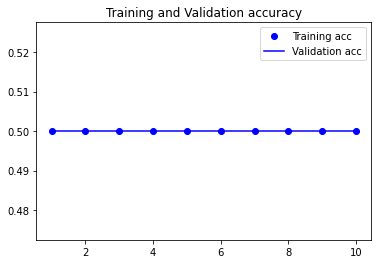

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.savefig('/content/drive/MyDrive/data分析/dogs-vs-cats/accuracy.png')
plt.show()
plt.close()

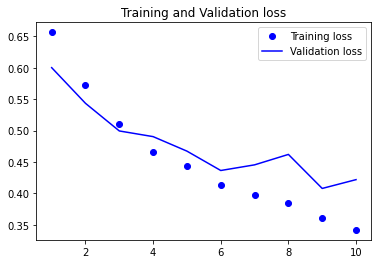

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.savefig('/content/drive/MyDrive/data分析/dogs-vs-cats/loss.png')
plt.show()
plt.close()

In [ ]:
hist_df = pd.DataFrame(history.history)
hist_df.to_csv('/content/drive/MyDrive/data分析/dogs-vs-cats/history.csv')

In [ ]:
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.656405,0.5,0.600093,0.5
1,0.572470,0.5,0.543326,0.5
2,0.510017,0.5,0.499384,0.5
3,0.466038,0.5,0.490357,0.5
4,0.443098,0.5,0.467279,0.5
5,0.412653,0.5,0.436472,0.5
6,0.397288,0.5,0.445457,0.5
7,0.384306,0.5,0.462049,0.5
8,0.361623,0.5,0.407932,0.5
9,0.341953,0.5,0.421932,0.5
